## FRAUD/ANOMALY DETECTION USING MACHINE LEARNING (IN-HOUSE PROJECT)

## 1.Importing Python  Libraries
#### These are some of the libraries we will be using in this code, we might use more as we progress forward.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

## 2.Dataset and its properties
Here we import our dataset which is in the form of a .csv file and we see some of the properties of the dataset. We will take help of pandas library for loading the dataset. Some visualisations will be done here with the data like heatmap, histogram, etc.

In [4]:
dataset = pd.read_csv("creditcard.csv")

In [5]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
checksize=len(dataset)
print("Number of Entries:",checksize)
print(dataset.columns,"\n")
print("SHAPE OF DATASET:",dataset.shape,"\n")
Fraud=dataset[dataset['Class'] == 1]
Valid=dataset[dataset['Class'] == 0]
print('Fraud Cases:',len(Fraud))
print('Valid Transactions:',len(Valid))

Number of Entries: 284807
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object') 

SHAPE OF DATASET: (284807, 31) 

Fraud Cases: 492
Valid Transactions: 284315


In [8]:
print(dataset.describe(),"\n")

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

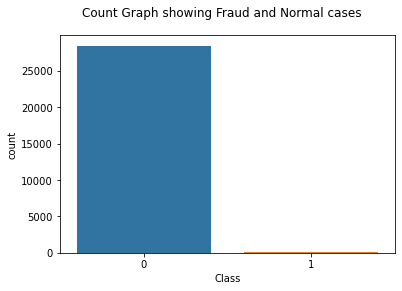

In [8]:
data = dataset.sample(frac=0.1, random_state = 42)
sns.countplot(x="Class",data=data,orient="h")
plt.suptitle("Count Graph showing Fraud and Normal cases")
plt.show()

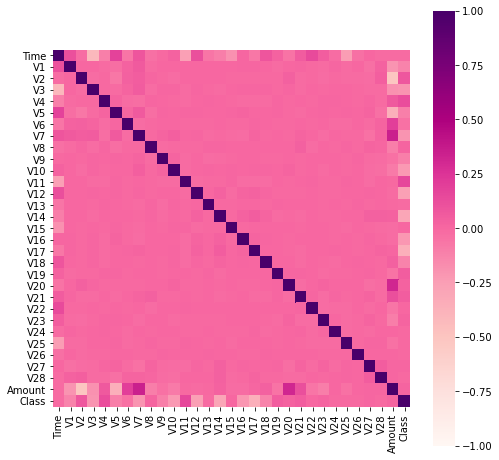

In [10]:
corrmat = data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corrmat,vmax=1,vmin=-1,cmap='RdPu',square=True)
plt.show()

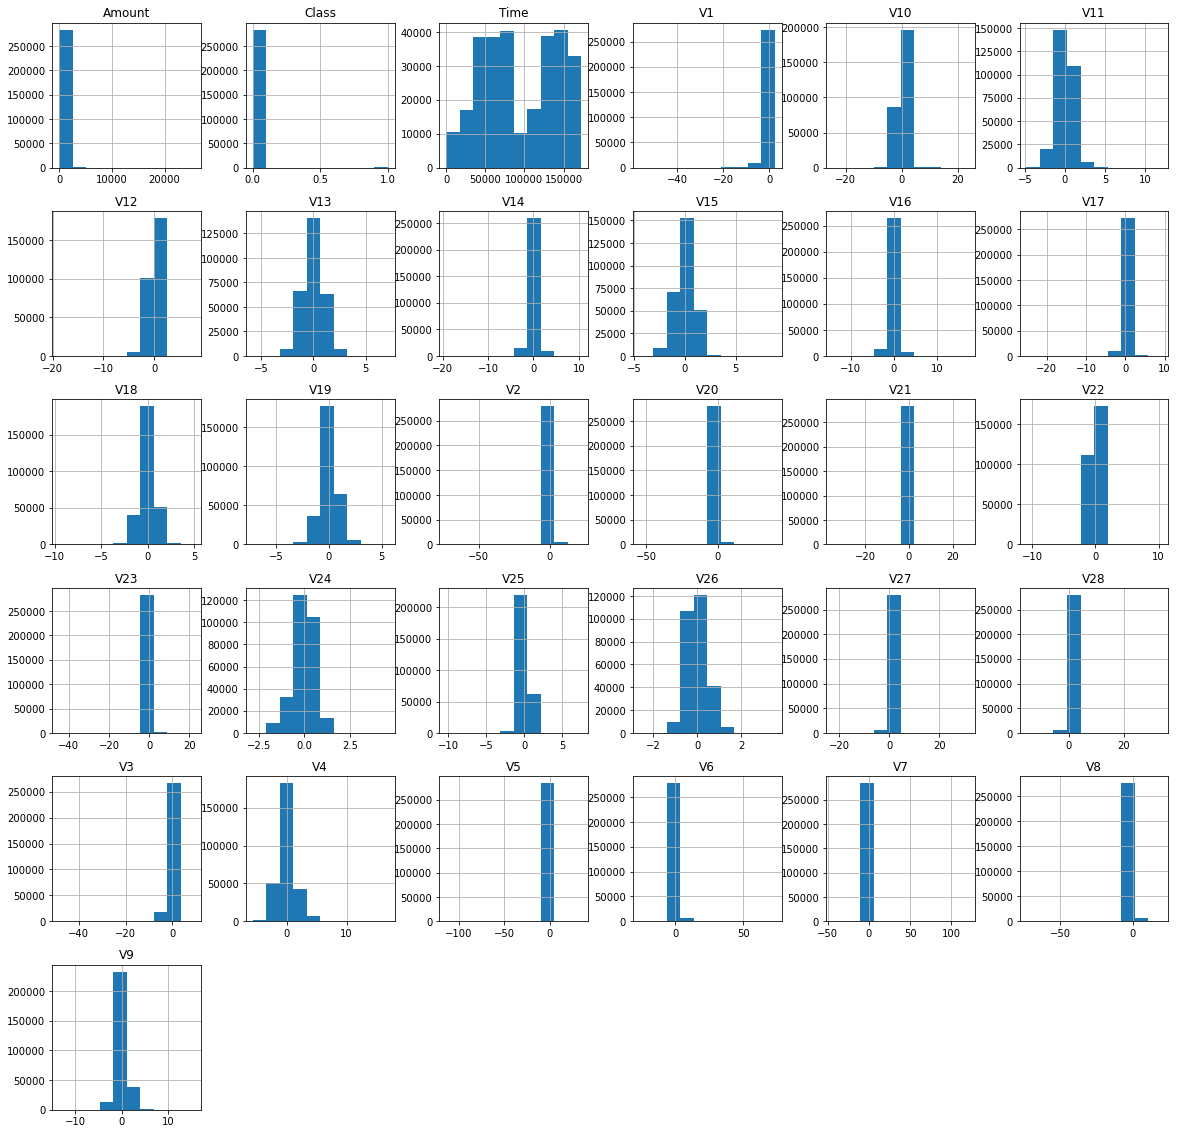

In [11]:
dataset.hist(figsize = (20, 20))
plt.show()

In [12]:
print("Number of Null Value:",dataset.isnull().sum().max())

Number of Null Value: 0


## 3.Creating Training and Test dataset

We will divide our dataset into 2 parts one being the training and other test. Training data will be used to train our model meaning upon which our machine will learn how to approach towards the problem whereas on the testing data our machine will be tested for its accuracy and it will be seen how well does it perform.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X=dataset.drop("Class",axis=1)
Y=dataset["Class"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [15]:
data = dataset.sample(frac=0.5, random_state = 42)
A=data.drop("Class",axis=1)
B=data["Class"]
x_train, x_test, y_train, y_test = train_test_split(A,B, test_size = 0.3, random_state = 42)
print(y_test.shape)

(42722,)


In [16]:
data1 = dataset.sample(frac=0.1, random_state = 42)
p=data1.drop("Class",axis=1)
q=data1["Class"]
train_data, test_data, train_target,test_target = train_test_split(p,q, test_size = 0.3, random_state = 42)
print(test_target.shape)

(8545,)


## 4.Model Creation and Predictions
From here on different models will be created and our dataset will be used on them to see which performs better than the others and by how much.

## 4.1 Linear Regression Model 
Linear regression gives us a  more scalar approach towards solving the problem i.e the graph generated shall be a straight line.

In [17]:
from sklearn.linear_model import LinearRegression

In [180]:
LR = LinearRegression()
LR.fit(X_train,Y_train)
predictions = LR.predict(X_test)

In [196]:
score=LR.score(X_test,Y_test)
a=np.array([])
a=np.append(a,score)
print("Score:",LR.score(X_test,Y_test))

Score: 0.5375177533083699


In [20]:
from yellowbrick.regressor import PredictionError
from sklearn.metrics import mean_squared_error

c:\users\aniru\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Mean Squared Error: 0.0007349633227495801


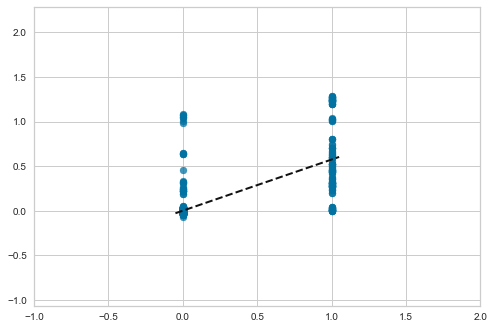

In [21]:
visual= PredictionError(LR)
visual.fit(X_train,Y_train)
visual.score(X_test,Y_test)
visual.show
print("Mean Squared Error:",mean_squared_error(Y_test, predictions))

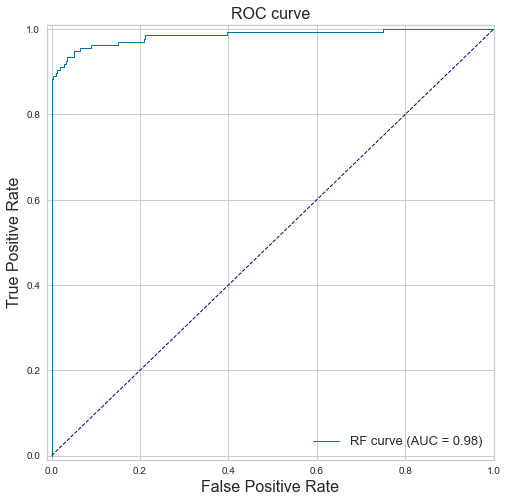

In [216]:
from sklearn.metrics import precision_score, precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc, average_precision_score
fp, tp, _ = roc_curve(Y_test,predictions)
roc_auc= auc(fp, tp)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fp, tp, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.show()

## 4.2 Logistic Regression
Logistic Regression model makes use of the probability of a specific event in order to predict the result and uses a logistic/sigmoid function while making its graph.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data=scaler.fit_transform(train_data)
test_data=scaler.transform(test_data)

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
LR1= LogisticRegression(C=0.5,random_state=42)
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_train=scaler.fit_transform(train_data)
x_test=scaler.transform(test_data)
LR1.fit(X_train,Y_train)
predictLR= LR1.predict(X_test)

In [197]:
from sklearn.metrics import classification_report
score1=LR1.score(X_test,Y_test)
a=np.append(a,score1)
print("Score:",LR1.score(X_test,Y_test))
print(classification_report(Y_test,predictLR))

Score: 0.9992743700478681
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.63      0.74       136

    accuracy                           1.00     85443
   macro avg       0.94      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Confusion Matrix:
[[85295    12]
 [   50    86]]
AxesSubplot(0.125,0.125;0.62x0.755)


[Text(0, 0.5, 'Actual 0s'), Text(0, 1.5, 'Actual 1s')]

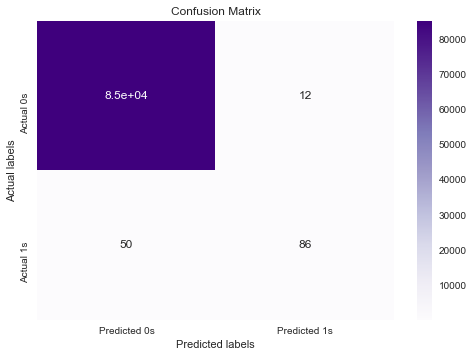

In [26]:
import seaborn as sns     
axis= plt.subplot()
print("Confusion Matrix:")
cm=confusion_matrix(Y_test, predictLR)
print(cm)
print(sns.heatmap(cm, annot=True, ax = axis,cmap='Purples'))
axis.set_xlabel('Predicted labels')
axis.set_ylabel('Actual labels') 
axis.set_title('Confusion Matrix') 
axis.xaxis.set_ticklabels(['Predicted 0s', 'Predicted 1s']) 
axis.yaxis.set_ticklabels(['Actual 0s', 'Actual 1s'])

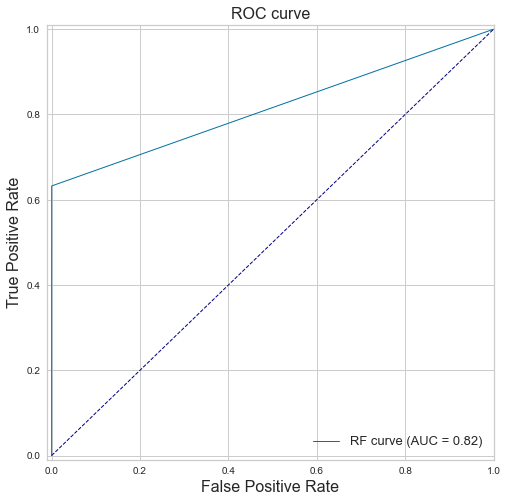

In [214]:
from sklearn.metrics import precision_score, precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc, average_precision_score
fp, tp, _ = roc_curve(Y_test,predictLR)
roc_auc= auc(fp, tp)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fp, tp, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.show()

## 4.3 ISOLATION FOREST
Isolation forest works by isolating the target cases which are usually very less and different from normal data points making it easier to detect and isolate.

In [30]:
from sklearn.ensemble import IsolationForest

In [179]:
IF = IsolationForest(random_state=0)
IF.fit(X_train,Y_train)
predictIF=IF.predict(X_test)
predictIF[predictIF == 1] = 0
predictIF[predictIF == -1] = 1

In [198]:
score2=accuracy_score(Y_test,predictIF)
a=np.append(a,score2)
print("Score:",accuracy_score(Y_test,predictIF))
print(classification_report(Y_test,predictIF))

Score: 0.960511686153342
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85307
           1       0.03      0.83      0.06       136

    accuracy                           0.96     85443
   macro avg       0.52      0.90      0.52     85443
weighted avg       1.00      0.96      0.98     85443



Confusion Matrix:
[[81956  3351]
 [   23   113]]
AxesSubplot(0.125,0.125;0.62x0.755)


[Text(0, 0.5, 'Actual 0s'), Text(0, 1.5, 'Actual 1s')]

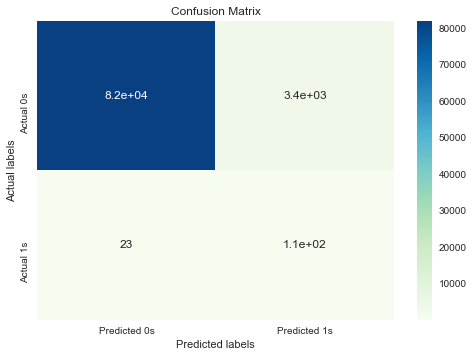

In [215]:
import seaborn as sns     
axis= plt.subplot()
print("Confusion Matrix:")
cm=confusion_matrix(Y_test,predictIF)
print(cm)
print(sns.heatmap(cm, annot=True, ax = axis,cmap='GnBu'))
axis.set_xlabel('Predicted labels')
axis.set_ylabel('Actual labels') 
axis.set_title('Confusion Matrix') 
axis.xaxis.set_ticklabels(['Predicted 0s', 'Predicted 1s']) 
axis.yaxis.set_ticklabels(['Actual 0s', 'Actual 1s'])

<ipython-input-47-70a6a2c73f2c>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


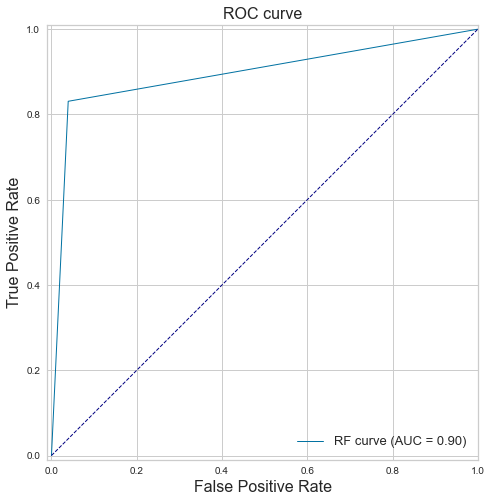

In [47]:
fp, tp, _ = roc_curve(Y_test,predictions)
roc_auc= auc(fp, tp)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fp, tp, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

## 4.4 Random Forest

In [153]:
from sklearn.ensemble import RandomForestClassifier
Rforest= RandomForestClassifier(max_depth=2, random_state=0)
Rforest.fit(train_data,train_target)
predforest=Rforest.predict(test_data)

In [199]:
score10=accuracy_score(test_target,predforest)
a=np.append(a,score10)
print(accuracy_score(test_target,predforest))
print(classification_report(test_target,predforest))

0.9989467524868344
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8538
           1       0.40      0.57      0.47         7

    accuracy                           1.00      8545
   macro avg       0.70      0.79      0.74      8545
weighted avg       1.00      1.00      1.00      8545



Confusion Matrix:
[[8532    6]
 [   3    4]]
AxesSubplot(0.125,0.125;0.62x0.755)


[Text(0, 0.5, 'Actual 0s'), Text(0, 1.5, 'Actual 1s')]

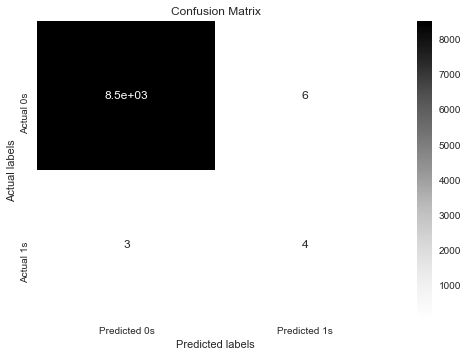

In [143]:
axis= plt.subplot()
print("Confusion Matrix:")
cm=confusion_matrix(test_target,predforest)
print(cm)
print(sns.heatmap(cm, annot=True, ax = axis,cmap="Greys"))
axis.set_xlabel('Predicted labels')
axis.set_ylabel('Actual labels') 
axis.set_title('Confusion Matrix') 
axis.xaxis.set_ticklabels(['Predicted 0s', 'Predicted 1s']) 
axis.yaxis.set_ticklabels(['Actual 0s', 'Actual 1s'])

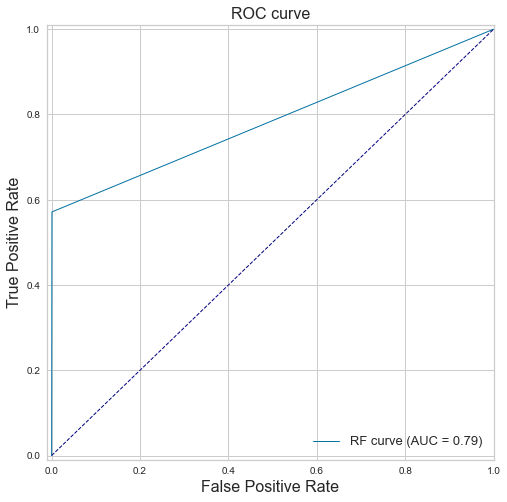

In [144]:
fp, tp, _ = roc_curve(test_target,predforest)
roc_auc= auc(fp, tp)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fp, tp, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')

plt.show()

## 4.5 DECISION TREE
Decision tree is a model which uses a tree like or flowchart to understand the problem. At each step all the possible decisions are taken in as nodes and then depending upon the data prediction is done.

In [35]:
from sklearn import tree

In [155]:
dcstree = tree.DecisionTreeClassifier()
dcstree.fit(X_train,Y_train)
predct=dcstree.predict(X_test)

In [200]:
score3=dcstree.score(X_test,Y_test)
a=np.append(a,score3)
print("SCORE:",dcstree.score(X_test,Y_test))
print(classification_report(Y_test,predct))

SCORE: 0.9991924440855307
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.71      0.82      0.76       136

    accuracy                           1.00     85443
   macro avg       0.86      0.91      0.88     85443
weighted avg       1.00      1.00      1.00     85443



Confusion Matrix:
[[85266    41]
 [   26   110]]
AxesSubplot(0.125,0.125;0.62x0.755)


[Text(0, 0.5, 'Actual 0s'), Text(0, 1.5, 'Actual 1s')]

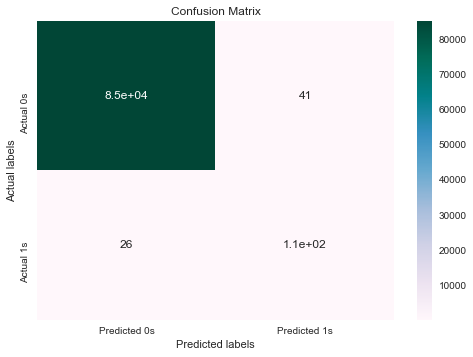

In [51]:
axis= plt.subplot()
print("Confusion Matrix:")
cm=confusion_matrix(Y_test, predct)
print(cm)
print(sns.heatmap(cm, annot=True, ax = axis,cmap='PuBuGn'))
axis.set_xlabel('Predicted labels')
axis.set_ylabel('Actual labels') 
axis.set_title('Confusion Matrix') 
axis.xaxis.set_ticklabels(['Predicted 0s', 'Predicted 1s']) 
axis.yaxis.set_ticklabels(['Actual 0s', 'Actual 1s'])

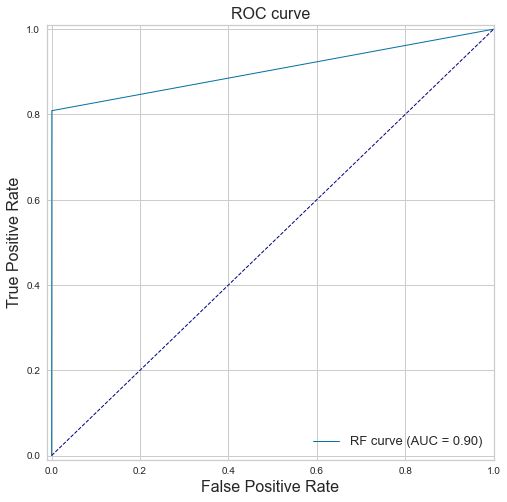

In [75]:
fp, tp, _ = roc_curve(Y_test,predct)
roc_auc= auc(fp, tp)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fp, tp, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.show()

## 4.6 SVM(SUPPORT VECTOR MACHINE)

In [159]:
data = dataset.sample(frac=0.5, random_state = 42)
A=data.drop("Class",axis=1)
B=data["Class"]
x_train, x_test, y_train, y_test = train_test_split(A,B, test_size = 0.3, random_state = 42)
print(y_test.shape)

(42722,)


In [160]:
data1 = dataset.sample(frac=0.1, random_state = 42)
p=data1.drop("Class",axis=1)
q=data1["Class"]
train_data, test_data, train_target,test_target = train_test_split(p,q, test_size = 0.3, random_state = 42)
print(test_target.shape)

(8545,)


In [60]:
from sklearn import svm

In [161]:
svc=svm.SVC(C= 1, kernel= 'linear', random_state= 0)
svc.fit(train_data,train_target)
print(svc.score(train_data, train_target))
pred1=svc.predict(test_data)

0.9984951845906902


In [201]:
from sklearn.metrics import classification_report
score5=accuracy_score(test_target,pred1)
a=np.append(a,score5)
print("SCORE:",accuracy_score(test_target,pred1))
print(classification_report(test_target,pred1,zero_division=1))

SCORE: 0.9983616149795201
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8538
           1       0.23      0.43      0.30         7

    accuracy                           1.00      8545
   macro avg       0.62      0.71      0.65      8545
weighted avg       1.00      1.00      1.00      8545



Confusion Matrix:
[[8528   10]
 [   4    3]]
AxesSubplot(0.125,0.125;0.62x0.755)


[Text(0, 0.5, 'Actual 0s'), Text(0, 1.5, 'Actual 1s')]

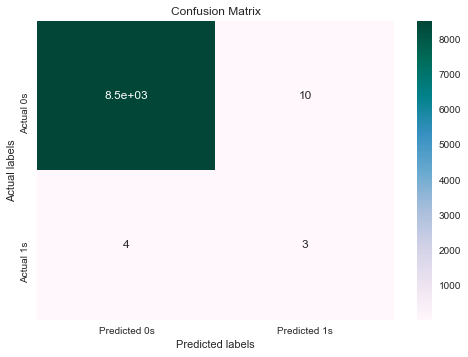

In [63]:
axis= plt.subplot()
print("Confusion Matrix:")
cm=confusion_matrix(test_target, pred1)
print(cm)
print(sns.heatmap(cm, annot=True, ax = axis,cmap='PuBuGn'))
axis.set_xlabel('Predicted labels')
axis.set_ylabel('Actual labels') 
axis.set_title('Confusion Matrix') 
axis.xaxis.set_ticklabels(['Predicted 0s', 'Predicted 1s']) 
axis.yaxis.set_ticklabels(['Actual 0s', 'Actual 1s'])

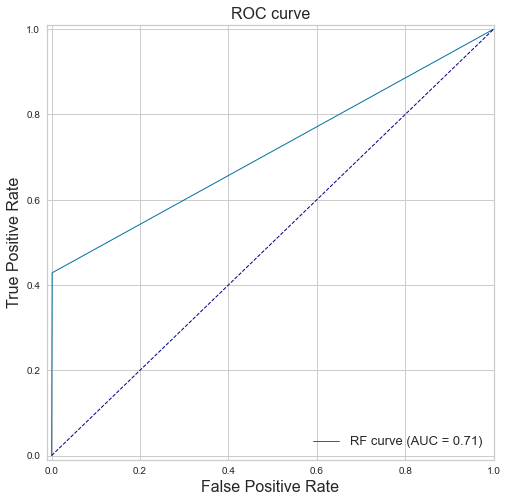

In [76]:
fp, tp, _ = roc_curve(test_target, pred1)
roc_auc= auc(fp, tp)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fp, tp, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.show()

## 4.7 KNN(K NEAREST NEIGHBOR)

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [163]:
knn = KNeighborsClassifier(n_neighbors=5,n_jobs=10)
knn.fit(x_train,y_train)
predictknn=knn.predict(x_test)

In [202]:
score6=accuracy_score(y_test,predictknn)
a=np.append(a,score6)
print("SCORE:",accuracy_score(y_test,predictknn))
print(classification_report(y_test,predictknn))

SCORE: 0.9983614999297785
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42653
           1       0.00      0.00      0.00        69

    accuracy                           1.00     42722
   macro avg       0.50      0.50      0.50     42722
weighted avg       1.00      1.00      1.00     42722



Confusion Matrix:
[[42652     1]
 [   69     0]]
AxesSubplot(0.125,0.125;0.62x0.755)


[Text(0, 0.5, 'Actual 0s'), Text(0, 1.5, 'Actual 1s')]

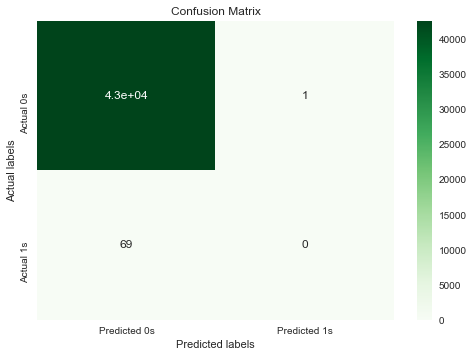

In [68]:
axis= plt.subplot()
print("Confusion Matrix:")
cm=confusion_matrix(y_test, predictknn)
print(cm)
print(sns.heatmap(cm, annot=True, ax = axis,cmap='Greens'))
axis.set_xlabel('Predicted labels')
axis.set_ylabel('Actual labels') 
axis.set_title('Confusion Matrix') 
axis.xaxis.set_ticklabels(['Predicted 0s', 'Predicted 1s']) 
axis.yaxis.set_ticklabels(['Actual 0s', 'Actual 1s'])

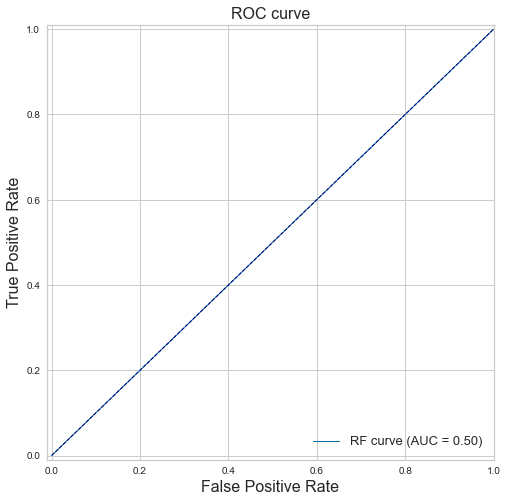

In [77]:
fp, tp, _ = roc_curve(y_test, predictknn)
roc_auc= auc(fp, tp)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fp, tp, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.show()

## 4.8 LOCAL OUTLIER FACTOR

In [78]:
from sklearn.neighbors import LocalOutlierFactor

In [165]:
Lof = LocalOutlierFactor(n_neighbors=2)
checklof=Lof.fit_predict(train_data)
Lof.negative_outlier_factor_

array([-1.10803884, -1.51294172, -0.90325635, ..., -0.99356711,
       -0.95002806, -0.95584338])

In [166]:
checklof[checklof== 1] = 0
checklof[checklof == -1] = 1

In [203]:
score7=accuracy_score(train_target,checklof)
a=np.append(a,score7)
print(accuracy_score(train_target,checklof))
print(classification_report(train_target,checklof))

0.8561396468699839
              precision    recall  f1-score   support

           0       1.00      0.86      0.92     19897
           1       0.00      0.28      0.01        39

    accuracy                           0.86     19936
   macro avg       0.50      0.57      0.47     19936
weighted avg       1.00      0.86      0.92     19936



Confusion Matrix:
[[17057  2840]
 [   28    11]]
AxesSubplot(0.125,0.125;0.62x0.755)


[Text(0, 0.5, 'Actual 0s'), Text(0, 1.5, 'Actual 1s')]

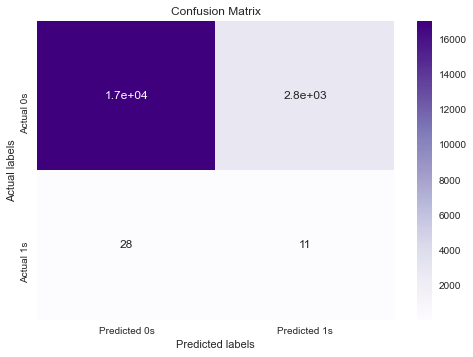

In [83]:
axis= plt.subplot()
print("Confusion Matrix:")
cm=confusion_matrix(train_target,checklof)
print(cm)
print(sns.heatmap(cm, annot=True, ax = axis,cmap='Purples'))
axis.set_xlabel('Predicted labels')
axis.set_ylabel('Actual labels') 
axis.set_title('Confusion Matrix') 
axis.xaxis.set_ticklabels(['Predicted 0s', 'Predicted 1s']) 
axis.yaxis.set_ticklabels(['Actual 0s', 'Actual 1s'])

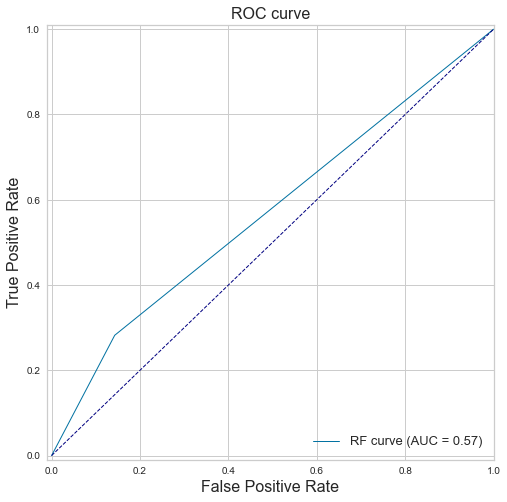

In [84]:
fp, tp, _ = roc_curve(train_target,checklof)
roc_auc= auc(fp, tp)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fp, tp, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.show()

## 4.9 Naive Bayes

In [168]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
checkgnb=gnb.predict(X_test)

In [204]:
score8=accuracy_score(Y_test,checkgnb)
a=np.append(a,score8)
print(accuracy_score(Y_test,checkgnb))
print(classification_report(Y_test,checkgnb))

0.9780438420935594
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.06      0.85      0.11       136

    accuracy                           0.98     85443
   macro avg       0.53      0.91      0.55     85443
weighted avg       1.00      0.98      0.99     85443



Confusion Matrix:
[[83452  1855]
 [   21   115]]
AxesSubplot(0.125,0.125;0.62x0.755)


[Text(0, 0.5, 'Actual 0s'), Text(0, 1.5, 'Actual 1s')]

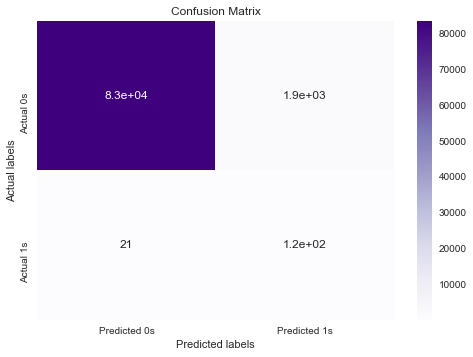

In [87]:
axis= plt.subplot()
print("Confusion Matrix:")
cm=confusion_matrix(Y_test,checkgnb)
print(cm)
print(sns.heatmap(cm, annot=True, ax = axis,cmap='Purples'))
axis.set_xlabel('Predicted labels')
axis.set_ylabel('Actual labels') 
axis.set_title('Confusion Matrix') 
axis.xaxis.set_ticklabels(['Predicted 0s', 'Predicted 1s']) 
axis.yaxis.set_ticklabels(['Actual 0s', 'Actual 1s'])

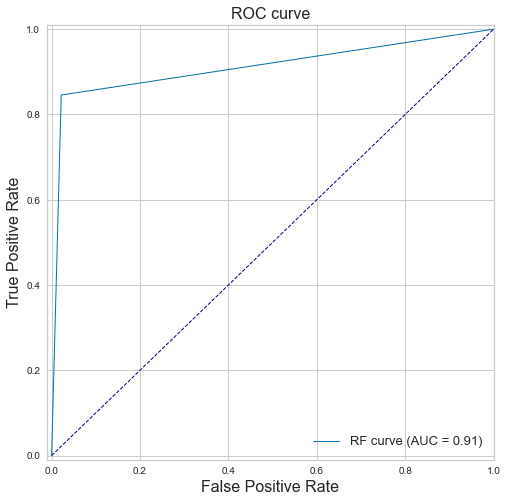

In [89]:
fp, tp, _ = roc_curve(Y_test,checkgnb)
roc_auc= auc(fp, tp)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fp, tp, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc))

plt.xlabel('False Positive ', fontsize=16)
plt.ylabel('True Positive ', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.show()

## 5. Model Comparison
All the models generated different scores based on their respective performance. Below we see how those scores compare to each other.

In [211]:
algos=[]
algos.append('LinearReg')
algos.append('LogisticReg')
algos.append('IsolationFor')
algos.append('RandomFor')
algos.append('DecisionTree')
algos.append('SVM')
algos.append('KNN')
algos.append('LOF')
algos.append('NaiveBayes')

In [212]:
#a=a[:-1]
print(a)
print(algos)

[0.53751775 0.99927437 0.96051169 0.99894675 0.99919244 0.99836161
 0.9983615  0.85613965 0.97804384]
['LinearReg', 'LogisticReg', 'IsolationFor', 'RandomFor', 'DecisionTree', 'SVM', 'KNN', 'LOF', 'NaiveBayes']


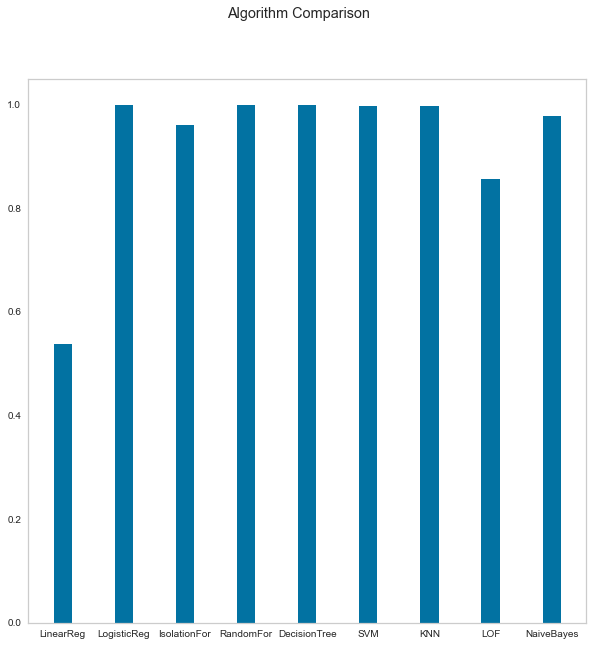

In [213]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Algorithm Comparison')
plt.bar(algos,a,width=0.3)
plt.grid(False)
plt.show()